## Assignment 2 [Draft version]
## Weight: 20%
## Unit - COMP329: Artificial Intelligence
## Date of Release: 18 October, 2018
## Date of Submission: 07 November, 2018 [11: 55 pm]


### Write your Details below:

# The goal of this assignment is to see the power of Evolutionary Algorithms such as Genetic Algorithm (GA) for solving real-world problem such as Travelling Salesman Problem (TSP) and evolving strategies for adversarial games such as Tic-Tac-Toe.

## Travelling Salesman Problem:
### Acknowledgment: 
#### The following is largely based on Peter Norvig's note on TSP: (https://github.com/norvig/pytudes/blob/master/ipynb/TSP.ipynb)
#### Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

<img src="tsp.png">

#### Let's us define the problem more precisely
- ***Given a set of cities***
<br>A Python `set` could represent a set of cities. An individual city might be just an integer index, or it might be (x, y) coordinates.
- ... ***and the distance between each pair of cities***: 
<br>We could use either a function, `distance(A, B),` or a table, `distance[A, B]`.
- ... ***what is the shortest possible tour***
<br>A tour is a sequential order in which to visit the cities; a function `shortest_tour(tours)` should find the one that minimizes `tour_length(tour)`, which is the sum of the distances between adjacent cities in the tour. 
- ... ***that visits each city once and returns to the starting city***
<br>Make sure a tour doesn't re-visit a city (except returning to the start).

### The *vocabulary* of the problem:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
- **Cities**: We will need to represent a set of cities; Python's `set` datatype might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities. This could be done with a function, `distance(A, B)`, or with a dict, `distance[A][B]` or `distance[A, B]`, or with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The sum of the distances of adjacent cities in the tour. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

### First algorithm: find the tour with shortest total distance from all possible tours

> *Generate all the possible tours of the cities, and choose the shortest one (the tour with the minimum total distance).*

### Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before finally retirning to the start. 
- A natural representation of the set of available cities is a Python `set`, and a natural representation of a tour is a sequence that is a *permutation* of the set. 
- The tuple `(1, 2, 3)`, for example, represents a tour that starts in city 1, moves to 2, then 3, and then returns to 1 to finish the tour.

In [2]:
alltours = itertools.permutations
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Representing Cities and Distance

Now for the notion of *distance*.  We define `total_distance(tour)` as the sum of the distances between consecutive cities in the tour; that part is shown below and is easy (with one Python-specific trick: when `i` is 0, then `distance(tour[0], tour[-1])` gives us the wrap-around distance between the first and last cities, because `tour[-1]` is the last element of `tour`). 


In [3]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [4]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

### Representing distance between cities

In [5]:
City = complex # Constructor for new cities, e.g. City(300, 400)

In [6]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [7]:
# An example to show the distance between city A and city B
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [8]:
# function to generate n cities randomly using random number generator
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [9]:
# Generating cities
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)

In [10]:
# Getting coordinates for 10 cities
cities10

{(205+492j),
 (234+567j),
 (249+545j),
 (394+523j),
 (432+221j),
 (444+161j),
 (447+117j),
 (454+205j),
 (533+54j),
 (621+105j)}

### functions to plot the tour

In [11]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

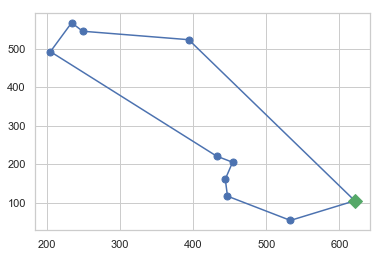

In [12]:
tour = exact_TSP(cities10)
plot_tour(tour)

### Removing redundant tours to increase efficiency
The permutation `(1, 2, 3)` represents the tour that goes from 1 to 2 to 3 and back to 1.  You may have noticed that there aren't really six different tours of three cities: the cities 1, 2, and 3 form a triangle;  any tour must connect the three points of the triangle; and there are really only two ways to do this: clockwise or counterclockwise.   In general, with $n$ cities, there are $n!$ (that is, $n$ factorial) permutations, but only  $(n-1)!$,  tours that are *distinct*: the tours `123`, `231`, and `312` are three ways of representing the *same* tour.

So we can make our `TSP` program $n$ times faster by never considering redundant tours. Arbitrarily, we will say that all tours must start with the "first" city in the set of cities. We don't have to change the definition of `TSP`&mdash;just by making `alltours` return only nonredundant tours, the whole program gets faster.


In [13]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cieaties):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))

In [14]:
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

### finding time based on First Approach: Exhaustive Search

In [15]:
%timeit exact_TSP(cities8)

162 ms ± 5.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit exact_non_redundant_TSP(cities8)

8.79 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Second approach: Approximate (Heuristic) algorithms

### Greedy approach (Nearest Neighbor approach)
> *Start at any city; at each step extend the tour by moving from the previous city to its nearest neighbor that has not yet been visited.*

This is called a *greedy algorithm*, because it greedily takes what looks best in the short term (the nearest neighbor) even when that won't always be the best in the long term. 

In [17]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [18]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [19]:
cities = generate_cities(10)

In [20]:
%timeit exact_non_redundant_TSP(cities)

1.97 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


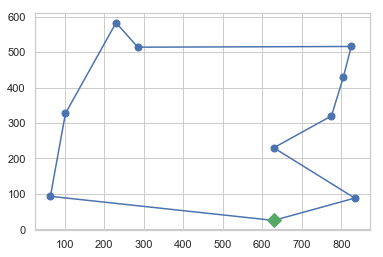

In [21]:
plot_tour(exact_non_redundant_TSP(cities))

In [22]:
%timeit greedy_TSP(cities)

29.9 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


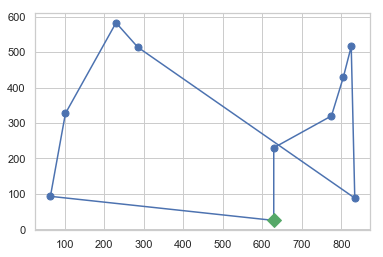

In [23]:
plot_tour(greedy_TSP(cities))

Comparing the time taken to get results for 10 cities, it is clear that greedy approach is efficient compared to the exhaustive search.

A [greedy algorithm](http://en.wikipedia.org/wiki/Greedy_algorithm) is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum. In many problems, a greedy strategy does not in general produce an optimal solution, but nonetheless a greedy heuristic may yield locally optimal solutions that approximate a global optimal solution in a reasonable time.

For many problmes greedy algorithms fail to produce the optimal solution, and may even produce the *unique worst possible solution*.

### A thought on computational complexity

<img src='http://imgs.xkcd.com/comics/travelling_salesman_problem.png' align='center' width='65%'/>


# Nature-inspired metaheuristic: Genetic Algorithm (GA)

- We have already studied GA in our lectures and did practice in our labs for one-max problem
- They are an option in which we dedicate a little more computational effort in order to produce better solutions than `greedy_TSP()`.

> We will be using the [DEAP](https://github.com/DEAP/deap) library to code this tackle this problem using a genetic algorithm.

[<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' width='29%' align='center'/>](https://github.com/DEAP/deap)

In [24]:
from deap import algorithms, base, creator, tools

In [25]:
num_cities = 30
cities = generate_cities(num_cities)

In [26]:
toolbox = base.Toolbox()

In [27]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [28]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [29]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [30]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [31]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [32]:
toolbox.register("evaluate", evaluation)

In [33]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [34]:
pop = toolbox.population(n=100)

In [35]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

CPU times: user 7.13 s, sys: 84.3 ms, total: 7.22 s
Wall time: 7.26 s


Let's check the efficiency of GA

In [36]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  3829.959440539707


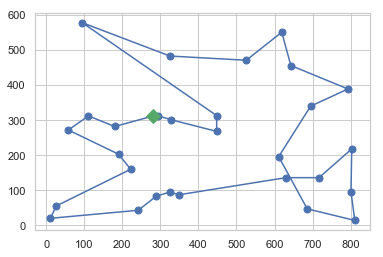

In [37]:
plot_tour(create_tour(best_individual))

It is interesting to assess how the fitness of the population changed as the evolution process took place. 

We can prepare an `deap.tools.Statistics` instance to specify what data to collect. 

In [38]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

In [39]:
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

#### Plotting mean and minimum fitness values as evolution takes place

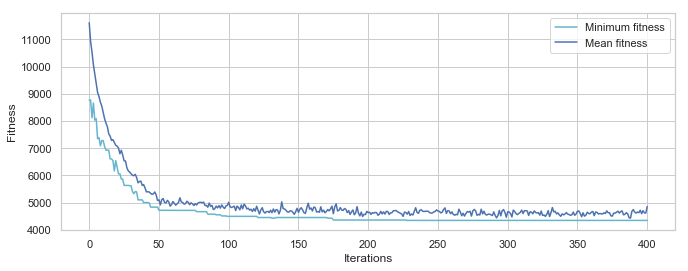

In [40]:
plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

### Q1. Compare the efficiency (time taken) of Exhaustive search, greedy search, and Genetic Algorithm for the 30 cities. [ 1 Marks]

In [41]:
#%%time
#result = exact_non_redundant_TSP(cities)
#The amount of distances is 30 factorial, which would take more time to compute than the age of the universe

In [42]:
%%time 
result = greedy_TSP(cities)

CPU times: user 729 µs, sys: 9 µs, total: 738 µs
Wall time: 752 µs


In [43]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
tools.selBest(result, k=1)[0]

CPU times: user 7.17 s, sys: 3.08 ms, total: 7.17 s
Wall time: 7.28 s


### Q2. Analyse the effect of population size for the above experiment. Try population size having value [25, 50, 75, 100, 125, 150, 175, 200] [ 1.5 Marks]

In [44]:
#population_results = []
averaging_amount = 5
for i in [25,50,75,100,125,150,175,200]:
    total = 0
    for _ in range(averaging_amount):
        pop = toolbox.population(n=i)
        result, log = algorithms.eaSimple(pop, toolbox,
                                         cxpb=0.8, mutpb=0.2,
                                         ngen=400, verbose=False)
        best_individual = tools.selBest(result,k=1)[0]
        total += evaluation(best_individual)[0]
    print("Population size:", i, "Average:", total/averaging_amount)
    #population_results.append((i,total/averaging_amount))


Population size: 25 Average: 4575.757746344146
Population size: 50 Average: 4085.7577828270055
Population size: 75 Average: 3905.008461559549
Population size: 100 Average: 3899.5561395911354
Population size: 125 Average: 3920.262861216529
Population size: 150 Average: 3696.9496412423905
Population size: 175 Average: 3661.8857313762373
Population size: 200 Average: 3675.728211891469


### Q3. What is the influence mutation and cross-over probability over the performance of the GA. [ 1.5 Marks]

In [45]:
cross_mutation_results = []
pop = toolbox.population(n=50)

for co in range(1,11):
    for mu in range(1,11):
        result, log = algorithms.eaSimple(pop, toolbox,
                                     cxpb=1/co, mutpb=1/mu,
                                     ngen=400, verbose=False)
        best_individual = tools.selBest(result,k=1)[0]
        result = evaluation(best_individual)[0]
        print("Crossover: %.2f Mutation: %.2f Result: %f" % (1/co,1/mu,result))
        cross_mutation_results.append((co,mu,result))
    print()

minimum = sorted(cross_mutation_results,key=lambda x: x[2])[0]
print("Best Crossover: %.2f Mutation: %.2f Result: %f" % (1/minimum[0],1/minimum[1],minimum[2]))
    

Crossover: 1.00 Mutation: 1.00 Result: 7577.986303
Crossover: 1.00 Mutation: 0.50 Result: 5369.031372
Crossover: 1.00 Mutation: 0.33 Result: 3585.125538
Crossover: 1.00 Mutation: 0.25 Result: 3570.598581
Crossover: 1.00 Mutation: 0.20 Result: 3570.598581
Crossover: 1.00 Mutation: 0.17 Result: 3570.598581
Crossover: 1.00 Mutation: 0.14 Result: 3570.598581
Crossover: 1.00 Mutation: 0.12 Result: 3570.598581
Crossover: 1.00 Mutation: 0.11 Result: 3570.598581
Crossover: 1.00 Mutation: 0.10 Result: 3570.598581

Crossover: 0.50 Mutation: 1.00 Result: 7268.996466
Crossover: 0.50 Mutation: 0.50 Result: 4157.659792
Crossover: 0.50 Mutation: 0.33 Result: 4105.342471
Crossover: 0.50 Mutation: 0.25 Result: 4105.342471
Crossover: 0.50 Mutation: 0.20 Result: 4105.342471
Crossover: 0.50 Mutation: 0.17 Result: 4105.342471
Crossover: 0.50 Mutation: 0.14 Result: 4105.342471
Crossover: 0.50 Mutation: 0.12 Result: 4105.342471
Crossover: 0.50 Mutation: 0.11 Result: 4105.342471
Crossover: 0.50 Mutation: 0.10

### Extending GA to real data

Given a set of 14 GPS positions where each coordinate represents a city in Burman (Officially the Republic of the Union of Myanmar), the objective is to solve the TSP problem on it. You need to do bit of independent research for finding formula how to convert GPS coodinates (in latitudes and longitudes) to the actual distance.

City[i] = {LAT[i], LON[i]}

In [1]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

NameError: name 'City' is not defined

### Q4. Calculate the total distance (in Kilometres) for between 14 cities based on *Latitude* and *Longitude*. [2 Marks] 

In [47]:
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
from math import radians, cos, sin, asin, sqrt
def haversine(p1, p2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1,lat1,lon2,lat2 = p1.real,p1.imag,p2.real,p2.imag
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def create_path(individual):
    return [cities[e] for e in individual]

def total_distance(path):
    return (sum([haversine(path[i-1],v) for i,v in enumerate(path)]),)

def evaluation(individual):
    return total_distance(create_path(individual))

cities = list(map(lambda x: City(x[0],x[1]), zip(LAT,LON)))

#creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
#creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("evaluate", evaluation)

#toolbox.register("mate", tools.cxOrdered)
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

pop = toolbox.population(n=100)
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
print("Done computing")

Done computing


## Q5. Provide the route you found and the shortest path in kilometers. Is it the optimal shortest path ? explain. [2 Marks]

Genetic best distance 1390.40km


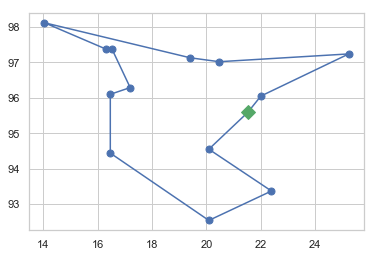

In [48]:
genetic_best = tools.selBest(result, k=1)[0]
print("Genetic best distance %.2fkm" % evaluation(genetic_best)[0])
plot_tour(create_path(genetic_best))

From just looking at the shortest path, it looks like we have a path that is the most optimal, however the only way to be sure would be to generate every path and test them one by one, however due to the fact that this is 14 cities and thus the amount of combinations is 14 factorial we aren't going to prove that this is the optimal path anytime soon.

However, using this Github repository (https://github.com/yihui-he/TSP) and modifying it a little for how it calculates distances both Simulated Annealing and 2-Opt give the same result as the genetic algorithm, so it is quite likely that this is an optimal path.

Size 14
2-Opt
secs 0.016391992569
1390.39514433
SA
secs 40.3526690006
1390.39514433 0
9 8 10 7 0 1 2 3 13 11 5 4 6 12

### Q6. Describe your fitness function and the way you encoded the solution [2 Marks]

### Q7. Provide the configuration of the GA you finally used to find your better results: mutation, crossover, population size, type of selection, mutation, crossover used, number of generations. [2 Marks]

## Solving Tic-Tac-Toe using Genetic Algorithm (GA)
The game of Tic Tac Toe is played on a 3 by 3 grid.  One player marks his spots with an X, and the other marks with an O.  The players alternate placing marks on the grid with the hopes of winning the game.  The winner of the game is the first player to place 3 of his marks in a row.  If the entire grid is filled with marks, and there is no winner, the game is determined to be a draw.  This project created a player to play the game without any existing knowledge of Tic Tac Toe strategy.  The only rule that was known to the evolving player was that the players alternated turns, and when it was the evolving player’s turn, it could only place a mark on an empty spot in the grid.  To create an artificially intelligent player, three AI (Artificial Intelligence) techniques were used.  Various techniques include minimax algorithm, artificial neural networks, and genetic algorithms.

### 3D tic-tac-toe
<img src="3d_tic-tac-toe-3d.jpg" style="width: 200px"/>

### Q8. How you approached the problem of representing the solution space, and why.  Did you face any specific problem for this – for instance, choosing between different possible representations? How did you overcome it/them? Give as example how, in your approach, Tic-Tac-Toe will be represented, and explain clearly how one can read off the strategy for Tic-Tac-Toe from this “chromosome”. [2 Marks] 

### Q9. What  fitness  function  you  chose  to  go  with  your  approach,  and  why.   As  before, describe if you faced any specific problem for this, and you overcame it/them. [1 Marks]

### Q10. What parameters for Genetic algorithm did you choose?  For instance what type of crossover did you choose,  with what probability,  and why.  Also outline how you determined that the solution you received is good enough. [2 Marks]

### Q11. Complete code for solving 3D Tic-Tac-Toe using Genetic Algorithm should be listed below. Note that this code should be complete (should not call any methods from the above code for solving TSP). You need to design the layout of the game either in console (command prompt) or Graphical User Interface (GUI) so that human (one of the player) can play against AI machine (GA strategy). [ 3 Marks]

### As the code in this block is executed:
- it provides human to pick either *X* or *O* to opt. 
- it provides option: Who will start the game, either human or machine?
- Provides the status: Win, loss or draw

In [49]:
import random
from deap import algorithms, base, creator, tools

def evaluation(f):
    return (abs(sum(f)-5),)

toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=10)

toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("evaluate", evaluation)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3) 

pop = toolbox.population(n=100)
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
result = tools.selBest(result, k=1)[0]
print(result)
print(sum(result))

/usr/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135, 0.9890236432783135]
9.890236432783135


In [ ]:
def get_input(message,valid):
    print(message,end='')
    s = input().lower()
    while True:
        if (valid(s)):
            return s
        print("\nInvalid input")
        print(message,end='')
        s = input().lower()
        
def print_boards(boards):
    for row in range(size):
        string = ""
        for board in boards:
            v = board[row]
            def check(x):
                if x is None:
                    return " "
                elif x:
                    return "X"
                return "O"
            v = map(check,v)
            string += "|" + "|".join(v) + "|   "    
        print(string.strip())

def check_valid_move(s):
    try:
        a,b,c = map(int,s.split())
        if ((a<0 or a>=size) or 
            (b<0 or b>=size) or 
            (c<0 or c>=size)):
            return False
        return boards[a][c][b] is None
    except:
        return False
    
def check_boards(move, check):
    x,y = move[1],move[2]
    board = boards[move[0]]
    board_transposed = list(zip(*board))
    
    #Normal board
    column_win = all([cell==check for cell in board[y]])
    if (column_win):
        return True
    row_win = all([cell==check for cell in board_transposed[x]])
    if (row_win):
        return True
    
    #TODO: Diagonals will need to be adapted with size ever changes
    diagonal1_win = all([board[i][i]==check for i in range(size)])
    if (diagonal1_win):
        return True
    diagonal2_win = all([board[-i-1][i]==check for i in range(size)])
    if (diagonal2_win):
        return True
    
    #3D Board 
    up_win = all([boards[i][y][x]==check for i in range(size)])
    if (up_win):
        return True
    
    #3D Diagonals
    down_win = all([boards[i][i][x]==check for i in range(size)])
    if (down_win):
        return True
    right_win = all([boards[i][y][i]==check for i in range(size)])
    if (right_win):
        return True
    
    down_right_win = all([boards[i][i][i]==check for i in range(size)])
    if (down_right_win):
        return True
    down_left_win = all([boards[i][i][-i-1]==check for i in range(size)])
    if (down_left_win):
        return True

def move_ends_game(move):
    return check_boards(move,True) or check_boards(move,False)

def move_ties_game():
    return not any([cell is None for board in boards for row in board for cell in row])

def get_computer_move():
    pass

#message = "Do you want to be Crosses or Noughts [X/O]: "
#human_is_cross = get_input(message,lambda x: x in ['x','o']) == 'x'

#message = "Human starts or computer starts? [H/C]: "
#human_move = get_input(message,lambda x: x in ['h','c']) == 'h'

human_is_cross = True
human_move = True

size = 3
boards = [[[None]*size for _ in range(size)] for _ in range(size)]

#boards[0][0][2] = True
#boards[0][2][2] = False
#boards[0][0][0] = True

#move = get_perfect_computer_move()
#print(move)

move_counter = 0
while True:
    print_boards(boards)
    if (human_move):
        move_raw = get_input("Enter move seperated by spaces (board x y) ", check_valid_move)
        move = list(map(int,move_raw.split()))
        board,x,y = move

        boards[board][y][x] = human_is_cross
        human_move = False
    else:
        #move = get_perfect_computer_move()
        #print(move)
        #move = move[1]
        move_raw = get_input("IM ROBOT", check_valid_move)
        move = list(map(int,move_raw.split()))
        
        boards[move[0]][move[2]][move[1]] = not human_is_cross
        human_move = True

    move_counter += 1
    if (move_counter >= size**3):
        print_boards(boards)
        print("It's a draw!")
        break

    if (move_ends_game(move)):
        print_boards(boards)
        print("Computer wins!" if human_move else "Player wins!")
        break


| | | |   | | | |   | | | |
| | | |   | | | |   | | | |
| | | |   | | | |   | | | |
Enter move seperated by spaces (board x y) 

In [ ]:
# Put your analysis here

## Your Submission method

Your submission should consist of this jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the output.

You have already used Jupyter Notebook earlier in the unit. In case you need help, you may refer the following tutorial https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook .

Late submissions may attract penalty in accordance with the assessment policy outlined in the unit guide.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).